In [ ]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from IPython.display import Image

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

#index_col mark any column as a key or index column for the dataframe
otherDataset = pandas.read_csv("D:\datasets\winemag-data_first150k.csv", index_col=0)
otherDataset.head()
#print(otherDataset)
#converts dataframe to csv
otherDataset.to_csv('cows_and_goats.csv')



In [ ]:
#gives details about numeric types
otherDataset.describe()

#gives details about object category types
otherDataset.describe(include = 'O')
#top is the most occuring detail
#freq is number of occureneces of top

In [ ]:
#check if a given variable is a dataframe
if isinstance(otherDataset,pandas.DataFrame):
    print("Yes")

In [ ]:
#get count of unique values in a coloumn
otherDataset.groupby('points').points.count()

#get minimum price of the group by points 
otherDataset.groupby('points').price.min()

#here's one way of selecting the name of the first wine reviewed from each winery in the dataset:
#otherDataset.groupby('winery').apply(lambda df: df.title.iloc[0])

#can also group by more than one column. For an example, here's how we would pick out the best wine by country and province:
#multiindex
#otherDataset.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

#otherDataset.groupby(['country']).price.agg([len, min, max])

dataMultiIndex = otherDataset.groupby(['country', 'province']).description.agg([len])

#returns dataframe by using agg for getting maximum price for every categaory of price
s = otherDataset.groupby(['price']).points.agg([max]).sort_index()

#returns series by using agg for getting maximum price for every categaory of price
d = otherDataset.groupby(['price']).points.max().sort_index()

# converting back to a regular index from multiindex
dataMultiIndex.reset_index()

#sortvalues
dataMultiIndex.sort_values(by='len')

#sortIndex
dataMultiIndex.sort_index()

#sort by multiple columns
#dataMultiIndex.sort_index(by=['country', 'len']).head(3)

Reset Index
Supppose we have the below multiindex dataframe

                   0
Embarked  Pclass     
C         1        85
          2        17
          3        66
Q         1         2
          2         3
          3        72
S         1       127
          2       164
          3       353
         
on reset_index() below is the modifiction done,
the old index is added as a column ie. "Embarked", and a new sequential index is used
on using (drop=True) in argument of reset_index(drop=True), the old index is not added as a column and is removed from df
Refer https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html for more

    Embarked  Pclass	0
0	C	      1	       85
1	C	      2	       17
2	C	      3	       66
3	Q	      1	       2
4	Q	      2	       3
5	Q	      3	       72
6	S	      1	       127
7	S	      2	       164
8	S	      3	       353




In [ ]:
#To access multiindex dataframe
Image(r"D:\DS\access multiindex df.png")

In [ ]:
# get uniqie values and thier count in a column
s = otherDataset.price.value_counts()


In [ ]:
#change index at runtime
#otherDataset.set_index('Unnamed: 0')

In [ ]:
#idxmax gives the index of the highest maximum value in a column/row
ratio = (otherDataset.price/otherDataset.points)
indexWithMaxValue = ratio.idxmax()
otherDataset.loc[indexWithMaxValue]

#otherDataset.loc[otherDataset.index[indexWithMaxValue]]

In [ ]:
#get row with max value
#dataset.max(axis=0)

#get column with max value
#dataset.max(axis=1)

#get index of row having max value in the column having that max value
#dataset.max(axis=1).idxmax()

#alternate way to get row with max value
dataset.iloc[dataset.max(axis = 1).idxmax()]


In [ ]:
#get the row with min value in whole dataframe
dataset.min(axis=0)

#get the column with min value in whole dataframe
dataset.min(axis=1)

#get index of the row having minimum value from the column having the same minimum value
dataset.min(axis=1).idxmin()

In [ ]:
print(dataset.shape)

In [ ]:
print(dataset.head(2))

In [ ]:
print(dataset.describe())

In [ ]:
#check missing values / get count number of null nan none values in each column
dataset.isna().sum()

In [ ]:
dataset['sepal-length'].head(3)

In [ ]:
#get access single column values
dataset['sepal-length'][0]

In [ ]:
#get column names
dataset.columns

https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
Different ways of filtering and selection in dataframes in above link

https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/

https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673

https://pbpython.com/categorical-encoding.html

https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

https://www.datacamp.com/community/tutorials/categorical-data
Reference links

In [ ]:
#get values of multiple column
dataset[["petal-length", 'sepal-length']].head(3)


To drop remove a column which is not neccasary
train.drop("PassengerId", axis = 1, inplace = True)

In [ ]:
#accessing single row data and multiple rows data by name of index
#iloc does consider index but loc does not consider index but labels
singlerow = dataset.loc[5]
print(singlerow)
multiRow = dataset.loc[[5,7]]
print ("\nBelow For Mutiple Rows\n")
print(multiRow)
#if index of a row is string and want to get all data of that row then dataset.loc['name']
#for multiple rows dataset.loc[['name1','name2']]

In [ ]:
#accessing single row data and multiple rows data by index
#iloc does consider index but loc does not consider index but labels
dataset.iloc[[5],[2]] #gets the (5+1) row index and (2+1) column index where index starts from 0
dataset.iloc[2:5,:2] #gets 2 to 5 index rows and 0 to 2 columns

In [ ]:
#accessing particular rows and columns
#iloc does consider index but loc does not consider index but labels
dataset.loc[[5,7],['sepal-width','petal-width']]

In [ ]:
#access by using index and labels as well
dataset.loc[dataset.index[0:5],["sepal-width","petal-width"]]

In [ ]:
#apply filters to columns
#this way gives only values selected with filters removing else values. SO by this method one does not need to remove nan null values from output
filter1 = dataset['sepal-width'].isin([3.4,3.5])
filter2 = dataset['petal-length'].isin([1.4])
newdf = dataset.loc[(dataset['sepal-length'] == 4.5) | (dataset['petal-width']>2)]
#dataset[filter1 & filter2]


Select rows by condtion and display particular columns by loc in 1 line
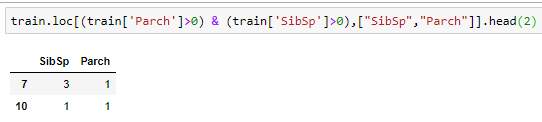

data.query('Senior_Management == True 
            and Gender =="Male" and Team =="Marketing" 
            and First_Name =="Johnny"', inplace = True) 
can use query method to filter the columns 

In [ ]:
#another way of apply filters to columns
filter3 = dataset['petal-length']==1.4
#dataset[filter3]

In [ ]:
#apply filters to columns and print others also with NaN or user defined value
# for such way of filtering dropna has to be used to remove null nan values
filter4 = dataset['petal-width']==0.4
filter5 = dataset['sepal-length']==5.4
temp = 5.9
sp1 = dataset.where(filter4 & filter5, inplace = False, other = temp)
dataset.head(3)
#inplace argument when set True changes the values in dataframe calling where itslef
#if inplace set to False then it returns the new dataframe with updated values having filters, the dataframe calling where remains same
#other argument is repsonsible for replacing the values in dataframe which do not matches the filter criteria sets to the object passed to "other" argument
#default "other" argument has NaN Value

In [ ]:
#in DataFrame method, pass data within curly braces where values for the keys are within square braces
#index agrument lets you enter names of index
fruit_sales = pandas.DataFrame({'Apples' :[35,41], 'Bananas':[21,34]}, index=['2017','2018'])
fruit_sales

In [ ]:
#replace all none values ie mask all unwanted values to specific value
toBeMasked = pandas.DataFrame({'A':[12,2,22],'B':[5,33,8], 'C':[33,44,55]})
toBeMasked.mask(toBeMasked > 12, -999)
maskAllNA = pandas.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[7, 2, 54, 3, None], 
                   "C":[20, 16, 11, 3, 8], 
                   "D":[14, 3, None, 2, 6]})
maskAllNA.mask(maskAllNA.isna(),1000)

In [ ]:
#selecting all rows and selected columns
dataset.loc[:,['sepal-width','petal-width']].head(2)


In [ ]:
#accessing selected rows and all columns
dataset.loc[[5,7],:]

In [ ]:
#access value at particular index of row and column by providing names of row and column
dataset.at[5,'sepal-width']

In [ ]:
#access value at particular index of row and column by providing index of row and column
dataset.iat[5,2]

In [ ]:
#another way to access particular value in dataframe
dataset.lookup([5],['sepal-width'])

In [ ]:
# pop/delete the column
# dataset.pop("columnName")
#copy dataframe
#dataset.copy()


In [ ]:
#group by
dataset.groupby(['class','sepal-width']).size().head(3)

In [ ]:
#get count of each kind of class column
print(dataset.groupby('class').size())

In [ ]:
#Constructing DataFrame from a dictionary.
d={'alpha':['apple','mango'], 'beta':['red', 'yellow']}
dicToDataFrame = pandas.DataFrame(d)
print(dicToDataFrame)
dicToDataFrame.dtypes
dicToDataFrame.alpha.dtype

#transform the points column from its existing int64 data type into a float64 data type:
#dataset.points.astype('float64')

In [ ]:
sales = {'Tony': 103,
         'Sally': 202,
         'Randy': 380,
         'Ellen': 101,
         'Fred': 82
        }
region = {'Tony': ['West'],
          'Sally': ['South'],
          'Carl': ['West'],
          'Archie': ['North'],
          'Randy': ['East'],
          'Ellen': ['South'],
          'Fred': numpy.nan,
          'Mo': ['East'],
          'HanWei': numpy.nan,
         }

region1 = {'Tony': 'West',
          'Sally': 'South',
          'Carl': 'West',
          'Archie': 'North',
          'Randy': 'East',
          'Ellen': 'South',
          'Fred': numpy.nan,
          'Mo': 'East',
          'HanWei': numpy.nan,
         }
# making dataframes from dictionaries
sales_df = pandas.DataFrame.from_dict(sales, orient='index', 
                                  columns=['sales'])
region_df = pandas.DataFrame.from_dict(region, orient='columns')

#third way
region_df1 = pandas.DataFrame(region1, index=[0])
region_df1
#in case of orient = columns  the values in the dictionary needs to be in list. or use the #third way
#in case of orient = index  the values in the dictionary needs not to be in list

In [ ]:
#Constructing DataFrame from numpy ndarray
print("Resultant DataFrame from different size numpy arrays")
numpyArrayToDataFrame = pandas.DataFrame(numpy.array([[1],[1,2],[1,2,3]]))
print(numpyArrayToDataFrame)
dd = [2]
sameSizeNumpyArrayToDataFrame = pandas.DataFrame(numpy.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a','b','c'])
print("Resultant DataFrame from same size numpy arrays")
print(sameSizeNumpyArrayToDataFrame)

In [ ]:
#Get count of non null values for all columns
dataset.count(axis=1).head(5)

In [ ]:
#sort
dataset.sort_values('sepal-width',ascending=False).head(2)

In [ ]:
#mean, axis is by deafaut 0 ie axis index meaning mean on column basis. if axis =1 then rowwise mean
#skipna  argument if true do not considers none values while computing mean
dfmean = pandas.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[7, 2, 54, 3, None], 
                   "C":[20, 16, 11, 3, 8], 
                   "D":[14, 3, None, 2, 6]})
print(dfmean)
dfWithMean = dfmean.mean(axis= 1, skipna = True)
dfWithMean

NaN, short for "Not a Number". For technical reasons these NaN values are always of the float64 dtype.


In [ ]:
#handling null values data cleaning
#gives the bool array with true in place of none values and false in place of non none values
dfWithNone = pandas.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[7, 2, 54, 3, None], 
                   "C":[20, 16, 11, 3, 8], 
                   "D":[14, 3, None, 2, 6]})
boolArray = pandas.isnull(dfWithNone)
print(boolArray)
#sum tells you whether any none present in the column or not.if sum is 0 it means all are not none values in the column
dd = pandas.isnull(dfWithNone).sum()
print(dd)
#get only rows/columns having nan null values
print(dfWithNone[dfWithNone.isnull().any(axis=1)])

In [ ]:
#opposite of isnull, gets true in case of not none else false
dfNone = pandas.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[7, 2, 54, 3, None], 
                   "C":[20, 16, 11, 3, 8], 
                   "D":[14, 3, None, 2, 6]})
#notnull will remove the reows having any null none nan values
p = pandas.notnull(dfNone)
#dataset[dataset.columnName.notnull()] will feature only rows havinf not null values in column 'columnName'


In [ ]:
#select all countries having NAN values 
otherDataset[pandas.isnull(otherDataset.country)]

#fill tha null nan values of a column with some value
#otherDataset.province.fillna("Unknown")
#other way tor fillna
#otherDataset = otherDataset.fillna({"province": "four"})

#to count number of nan null values of a column
missingPrice = otherDataset[otherDataset.price.isnull()]
l = len(missingPrice)
l

#other way to count nan null values
s = otherDataset.price.isnull().sum()

#other way to count nan null values
ss = pandas.isnull(otherDataset.price).sum()
print(ss)

In [ ]:
#removes the rows containing none nan null
dfdropNone = pandas.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[7, 2, 54, 3, None], 
                   "C":[20, 16, 11, 3, 8], 
                   "D":[14, 3, None, 2, 6]})
dropNoneRow = dfdropNone.dropna()
#dropna(thresh = 2) this will contain rows having atleast 2 not null values in a row 
#dropna(subset=['columnName']) this removes the rows having nan null in column specified only
dropNoneRow

In [ ]:
#removes the columns containing the none values 
dfdropNoneColumn = pandas.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[7, 2, 54, 3, None], 
                   "C":[20, 16, 11, 3, 8], 
                   "D":[14, 3, None, 2, 6]})
dropNoneColumn = dfdropNoneColumn.dropna(axis=1)
dropNoneColumn

In [ ]:
#fill none /null values with some value
dffill = pandas.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[7, 2, 54, 3, None], 
                   "C":[20, 16, 11, 3, 8], 
                   "D":[14, 3, None, 2, 6]})
dfx = dffill.fillna(dffill.mean())
dfx

s.replace([1,3],['one','three']) replace all 1 with 3 and all one with three

Dealing with category data Using Replace

i) If their are less categories
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

obj_df.replace(cleanup_nums, inplace=True)
In obj_df, num_doors & num_cylinders are two columns which have string values defining numbers, so if we want to convert each string to its equivalent numeric then above is the way

ii) If theire are many categories
Step1. Convert 'carrier' column into category type and den get the categories in list format
    labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
Step2. Using Dictionary Comprehension, labels has the categories in list form and
    list(range(1,len(labels)+1)) has the values in list form
    Zip the categories with the values
    replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
Step3. cat_df_flights_replace.replace(replace_map_comp, inplace=True)

df1.append(df2) add rows
df.concat([df1, df2],axis=1) — add columns
df1.join(df2,on=col1,how='inner') — QL-style join the columns in df1 with the columns on df2 where the rows for colhave identical values. how can be equal to one of: 'left', 'right', 'outer', 'inner'

1). One way using loc
Replace column value based on condition 
The replacement can be done on existing column and by creating new column as well
created category from existing column based on values of it
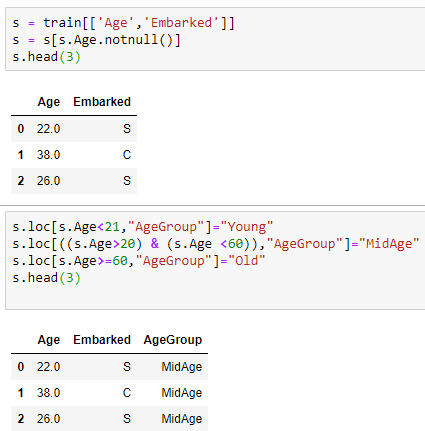

2)other way using cut
Creating slots from a column or create category from column data
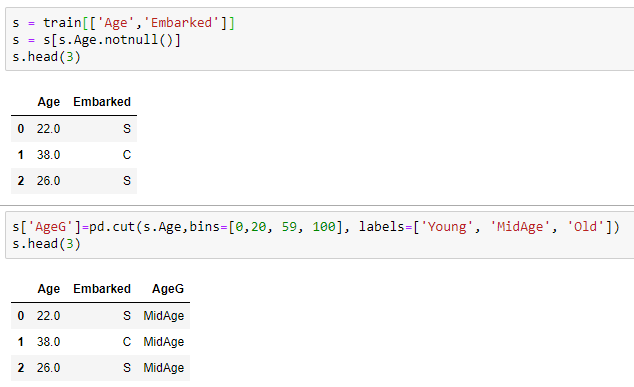

Create equal slots from a column / create category / group category from colum data

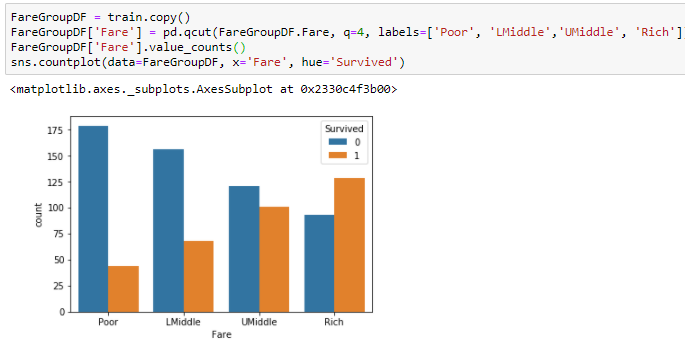

Melt command.
Get all columns merged to a single column, combine multiple columns to a single column, 
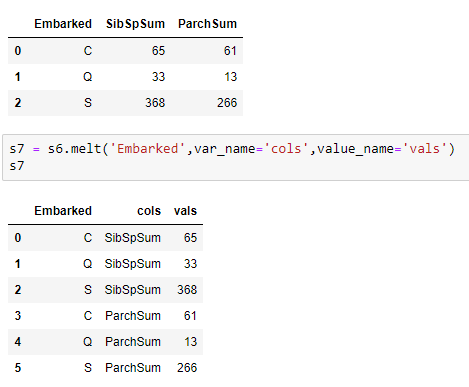

map replace string values to numbers  categories

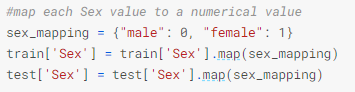



In [ ]:
#find the values counts of each unique value in the given Series object.
series = pandas.Series(['New York', 'Chicago', 'Toronto', 'Lisbon', 'Rio', 'Chicago', 'Lisbon'])
series.value_counts() 

In [ ]:
sales = pandas.Series([30,40,50], index = ['2015 sales', '2016 sales', '2017 sales'], name = 'SalesList')
sales
#Series does not have column name, it has overall name

In [ ]:
#rename column name
#otherDataset.rename(columns={'points':'score'})

# lets you rename index or column values by specifying a index or column keyword parameter, respectively.
#otherDataset.rename(index={0: 'firstEntry', 1: 'secondEntry'})

#Both the row index and the column index can have their own name attribute. The complimentary rename_axis() 
#otherDataset.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

gaming_products = pd.read_csv("../input/things-on-reddit/top-things/top-things/reddits/g/gaming.csv")
gaming_products['subreddit'] = "r/gaming"
movie_products = pd.read_csv("../input/things-on-reddit/top-things/top-things/reddits/m/movies.csv")
movie_products['subreddit'] = "r/movies"

suppose 2 different dataframes
to merge both the dataframes in one: so suppose first is having 10 entries , other is having 5 entries so after concat resulting dataframe will have 15 entries
combined_products = pd.concat([gaming_products, movie_products])

suppose we need to merge combine two dataframes insense suppose first is having 5 columns and second is having 3 columns so resulting dataframe will have 8 columns, 
powerlifting_meets = pd.read_csv("../input/powerlifting-database/meets.csv")
powerlifting_competitors = pd.read_csv("../input/powerlifting-database/openpowerlifting.csv")

powerlifting_meets.set_index('MeetID').join(powerlifting_competitors.set_index('MeetID'))

left = canadian_youtube.set_index(['title', 'trending_date'])
right = british_youtube.set_index(['title', 'trending_date'])

left.join(right, lsuffix='_CAN', rsuffix='_UK')


to have only columns which have datatype as object type, select only specific columns with a particular datatype
obj_df = df.select_dtypes(include=['object']).copy()

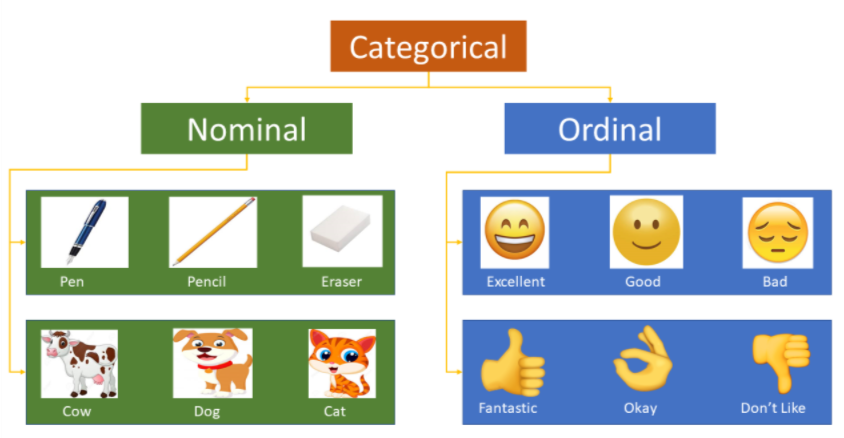



Ways to deal with category values
1. Label Encoding
Approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. For example, the body_style column contains 5 different values. We could choose to encode it like this:

convertible -> 0
hardtop -> 1
hatchback -> 2
sedan -> 3
wagon -> 4

One trick you can use in pandas is to convert a column to a category, then use those category values for your label encoding:

obj_df["body_style"] = obj_df["body_style"].astype('category')
obj_df.dtypes

aspiration           object
num_doors             int64
body_style         category
dtype: object

Then you can assign the encoded variable to a new column using the cat.codes accessor:

obj_df["body_style_cat"] = obj_df["body_style"].cat.codes

Now a new column named "body_style_cat" is created having values with numeric values corresponding to the category.

obj_df["body_style"].cat.categories => fetches all categories

other way 

One can also do the below to keep the newly created column seperate from original df
co = iris["class"].astype('category')
co = co.cat.codes

Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the data set in real life? Does a wagon have “4X” more weight in our calculation than the convertible? In this example, I don’t think so.

2. One Hot Encoding
A common alternative approach is called one hot encoding (but also goes by several different names shown below). 
Despite the different names, the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. 
This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

Pandas supports this feature using get_dummies. This function is named this way because it creates dummy/indicator variables (aka 1 or 0).

Hopefully a simple example will make this more clear. We can look at the column drive_wheels where we have values of 4wd , fwd or rwd . By using get_dummies we can convert this to three columns with a 1 or 0 corresponding to the correct value:

pd.get_dummies(obj_df, columns=["drive_wheels"]).head()

pd.get_dummies(obj_df, columns=["body_style", "drive_wheels"], prefix=["body", "drive"]).head()
will attach "body" as a prefix to all newly created columns from categories in body_style and attach "drive" as a prefix to all newly created columns from categories in "drive_wheels"

The other concept to keep in mind is that get_dummies returns the full dataframe so you will need to filter out the objects using select_dtypes when you are ready to do the final analysis.

One hot encoding, is very useful but it can cause the number of columns to expand greatly if you have very many unique values in a column. For the number of values in this example, it is not a problem. However you can see how this gets really challenging to manage when you have many more options.
IT leads to "curse of dimensionality".
The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

3. Using WHere
In this particular data set, there is a column called engine_type that contains several different values:

obj_df["engine_type"].value_counts()
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

For the sake of discussion, maybe all we care about is whether or not the engine is an Overhead Cam (OHC) or not. In other words, the various versions of OHC are all the same for this analysis. If this is the case, then we could use the str accessor plus np.where to create a new column the indicates whether or not the car has an OHC engine.

obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, other=0)

Resulting dataset will contain a column "OHC_Code", which will contain either 1 if ohc string present else 0

4. Using Binary Encoding

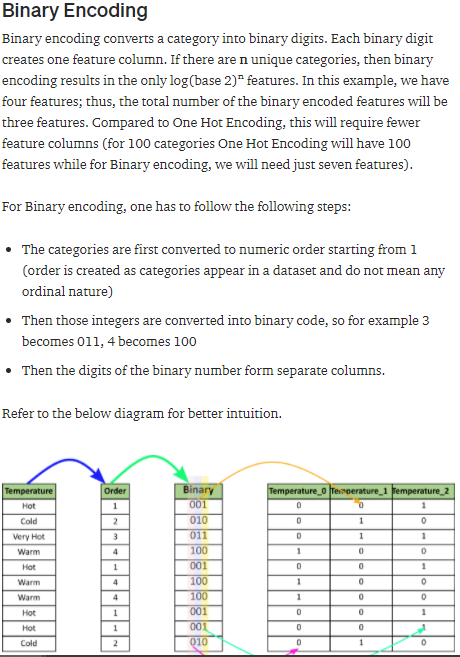

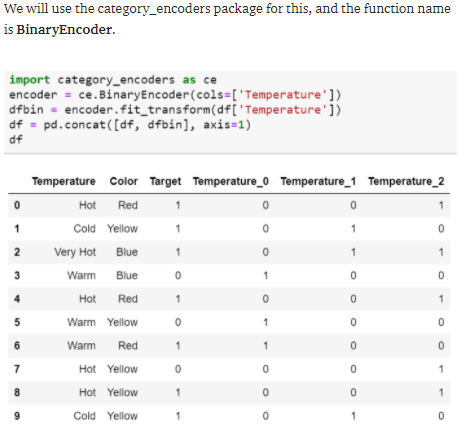

In [ ]:
ts = pandas.Series(numpy.random.randn(1000),index=pandas.date_range('1/1/2000', periods=1000))

df = pandas.DataFrame(numpy.random.randn(1000,4),index=ts.index, columns=list('ABCD'))
df.head()

In [ ]:
#box nd whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [ ]:
#histograms
dataset.hist()
pyplot.show()

In [ ]:
scatter_matrix(dataset)
pyplot.show()

In [ ]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state = 1)

In [ ]:
#get the best model
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results =[]
names =[]
for name, model in models:
    kFold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kFold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparision')
pyplot.show()